**Group Member**<br>

Jie He                       (21244656)<br>
Poojita Sureshkumar          (21235130)<br>
Prateeksha Ravindra Naik     (21236454)<br>
Zhao Yi                      (21244481)

# 1. Data Collection

Data Source: https://www.kaggle.com/datasets/riteshpatil8998/spotify-dataset?select=data.csv

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import itertools
%matplotlib inline
import warnings; warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r'/Users/yee/Downloads/Curriculums/5114 /Group Assignment/archive/data.csv')

In [3]:
df.head()

acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.628     0                           Keep A Song In Your Soul   
1    -7.261     0                               I Put A Spell On You   
2   -12.098     1                                       Golfing Papa   
3    -7.311     1  True House Music - Xavier Santos & Carlos Gomi...   
4    -6.036     0                                          Xuniverxe   

   popularity release_date  speechiness    tempo  valence  year  
0          12         1920       0.0936  149.976   0.6340  1920  
1           7   1920-01-05       0.0534   86.889   0.9500  1920  
2           4         1920       0.1740   97.600   0.6890  1920  
3          17   1920-01-01       0.0425  127.997   0.0422  1920  
4           2   1920-10-01       0.0768  122.076   0.2990  1920

# 2. Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

## Data Attributes

**acousticness :** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.<br>
**artists :** The name of the artists.<br>
**danceability :** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.<br>
**duration_ms :** The duration of the track in milliseconds.<br>
**energy :** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.<br>
**explicit :** if the song is rated as explicit.<br>
**id :** The unique ID number of each song in Spotify.<br>
**instrumentalness :** Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.<br>
**key :** The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.<br>
**liveness :** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.<br>
**loudness :** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.<br>
**mode :** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.<br>
**name :** The name of the song.<br>
**popularity :** the popularity measures from 0 to 100 of whether the song is popular.<br>
**release_date :** the date of the song released.<br>
**speechiness :** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.<br>
**tempo :** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.<br>
**valence :** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).<br>
**year :** the year of the song released.<br>

In [5]:
# Convert duration_ms variables in minutes rather than miliseconds
df['duration_ms']=(df['duration_ms']/60000)
df.rename(columns = {'duration_ms':'duration'}, inplace = True)
df.head()

acousticness                    artists  danceability  duration  energy  \
0      0.991000            ['Mamie Smith']         0.598  2.805550   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852  2.503333   0.517   
2      0.993000            ['Mamie Smith']         0.647  2.730450   0.186   
3      0.000173        ['Oscar Velazquez']         0.730  7.034783   0.798   
4      0.295000                   ['Mixe']         0.704  2.753733   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.628     0                           Keep A Song In Your Soul   
1    -7.261     0                               I Put A Spell On You   
2   -12.098     1                                       Golfing Papa   
3    -7.311     1  True House Music - Xavier Santos & Carlos Gomi...   
4    -6.036     0                                          Xuniverxe   

   popularity release_date  speechiness    tempo  valence  year  
0          12         1920       0.0936  149.976   0.6340  1920  
1           7   1920-01-05       0.0534   86.889   0.9500  1920  
2           4         1920       0.1740   97.600   0.6890  1920  
3          17   1920-01-01       0.0425  127.997   0.0422  1920  
4           2   1920-10-01       0.0768  122.076   0.2990  1920

In [6]:
#remove some columns that will not be used or duplicative
df=df.drop(columns=['explicit','id','release_date','mode'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration          174389 non-null  float64
 4   energy            174389 non-null  float64
 5   instrumentalness  174389 non-null  float64
 6   key               174389 non-null  int64  
 7   liveness          174389 non-null  float64
 8   loudness          174389 non-null  float64
 9   name              174389 non-null  object 
 10  popularity        174389 non-null  int64  
 11  speechiness       174389 non-null  float64
 12  tempo             174389 non-null  float64
 13  valence           174389 non-null  float64
 14  year              174389 non-null  int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 20.0+ MB


## EDA Visualization

In [7]:
df_sorted = df.sort_values('popularity',ascending=False)
df_sorted.head()

acousticness                       artists  danceability  duration  \
20062         0.721            ['Olivia Rodrigo']         0.585  4.033567   
19862         0.221     ['24kGoldn', 'iann dior']         0.700  2.342100   
19866         0.468             ['Ariana Grande']         0.737  2.872083   
19886         0.401  ['Bad Bunny', 'Jhay Cortez']         0.731  3.418167   
19976         0.212                   ['KAROL G']         0.863  2.982450   

       energy  instrumentalness  key  liveness  loudness  \
20062   0.436          0.000013   10    0.1050    -8.761   
19862   0.722          0.000000    7    0.2720    -3.558   
19866   0.802          0.000000    0    0.0931    -4.771   
19886   0.573          0.000052    4    0.1130   -10.059   
19976   0.666          0.000493    1    0.1030    -4.158   

                         name  popularity  speechiness    tempo  valence  year  
20062         drivers license         100       0.0601  143.874    0.132  2021  
19862  Mood (feat. iann dior)          96       0.0369   90.989    0.756  2020  
19866               positions          96       0.0878  144.015    0.682  2020  
19886                  DÁKITI          95       0.0544  109.928    0.145  2020  
19976                 BICHOTA          95       0.1520  163.908    0.838  2020

In [8]:
df_sorted[['popularity']].describe()

popularity
count  174389.000000
mean       25.693381
std        21.872740
min         0.000000
25%         1.000000
50%        25.000000
75%        42.000000
max       100.000000

**Observations:**<br>
From the above, we can see the popularity of the dataset is not high on the whole. The mean is about only 25, and even 75% part is around 42. 

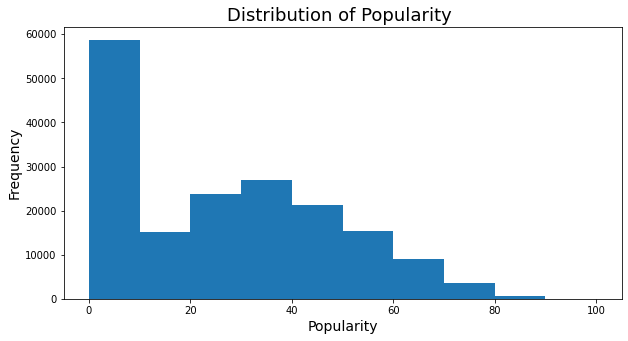

In [9]:
fig, ax= plt.subplots(figsize=(10,5))
plt.title('Distribution of Popularity ', fontsize=18)
df_sorted['popularity'].plot(kind='hist')
plt.xlabel('Popularity',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()

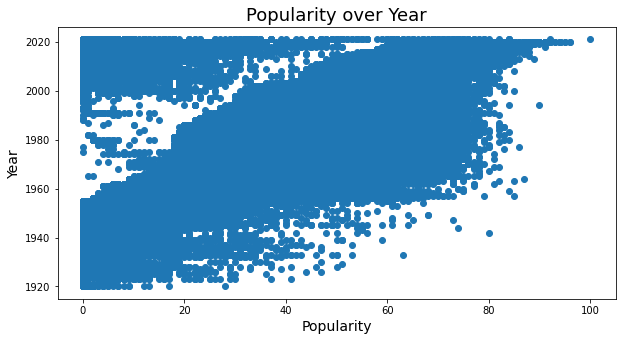

In [10]:
fig, ax= plt.subplots(figsize=(10,5))
plt.title('Popularity over Year', fontsize=18)
x = df_sorted['popularity']
y = df_sorted['year']
plt.scatter(x, y)
plt.xlabel('Popularity',fontsize=14)
plt.ylabel('Year',fontsize=14)
plt.show()

**Observations:**<br>
1. From the Popularity Distribution Diagram, we can see there are tons of data on popularity whose value is zero. Considering our topic is analyzing and predicting the features that have an impact on high popularity, we think these zero values are useless and might bring the noise to the dataset, and we would remove these data from the dataset.<br>
2. From Popuparity with Year Diagram, it can be noticed that popularity increased gradually over the years. Especially after the 1960, the popularity has enhanced more than 60, and after the 2000, it has reached to more than 80 even though the track popularity has begun to polarize.<br>
3. With the development of technology, more and more songs can be easily recorded and distributed, which will be exposed to more audiences and make the excellent songs more popular.

In [11]:
#remove data with zero value of popularity, in total is about 40903 rows
df = df.loc[(df['popularity'] > 0)]
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133484 entries, 0 to 174387
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      133484 non-null  float64
 1   artists           133484 non-null  object 
 2   danceability      133484 non-null  float64
 3   duration          133484 non-null  float64
 4   energy            133484 non-null  float64
 5   instrumentalness  133484 non-null  float64
 6   key               133484 non-null  int64  
 7   liveness          133484 non-null  float64
 8   loudness          133484 non-null  float64
 9   name              133484 non-null  object 
 10  popularity        133484 non-null  int64  
 11  speechiness       133484 non-null  float64
 12  tempo             133484 non-null  float64
 13  valence           133484 non-null  float64
 14  year              133484 non-null  int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 16.3+ MB


In [12]:
#Drop the non-transformed columns that will not be used in building model
dfNum=df.drop(columns=['artists','name','year'])
dfNum.head()

acousticness  danceability  duration  energy  instrumentalness  key  \
0      0.991000         0.598  2.805550   0.224          0.000522    5   
1      0.643000         0.852  2.503333   0.517          0.026400    5   
2      0.993000         0.647  2.730450   0.186          0.000018    0   
3      0.000173         0.730  7.034783   0.798          0.801000    2   
4      0.295000         0.704  2.753733   0.707          0.000246   10   

   liveness  loudness  popularity  speechiness    tempo  valence  
0    0.3790   -12.628          12       0.0936  149.976   0.6340  
1    0.0809    -7.261           7       0.0534   86.889   0.9500  
2    0.5190   -12.098           4       0.1740   97.600   0.6890  
3    0.1280    -7.311          17       0.0425  127.997   0.0422  
4    0.4020    -6.036           2       0.0768  122.076   0.2990

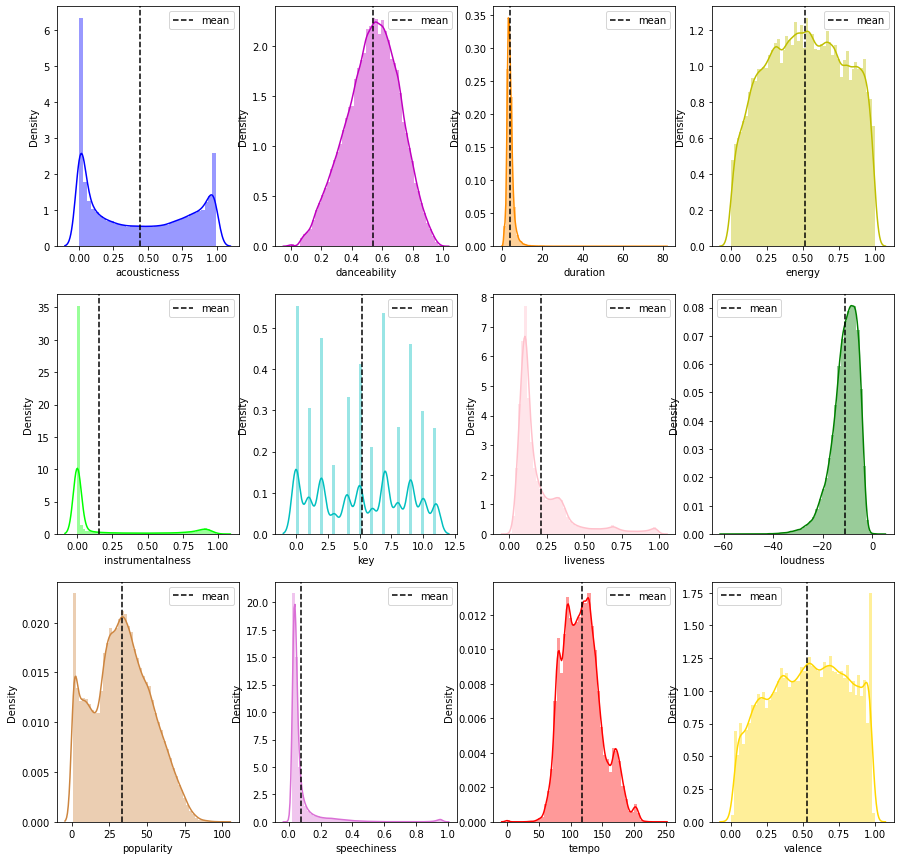

In [13]:
# Analyzing the distributions of each features to find the outliers
cols = [i for i in dfNum.columns]
fig = plt.figure(figsize=(15,15))
for i,j,k in itertools.zip_longest(cols,range(len(cols)), ["b","m","darkorange","y","lime","c","pink","g","peru","orchid","r","gold"]):
    if type(j) is int:
        plt.subplot(3,4,j+1)
        ax = sns.distplot(dfNum[i],color=k)
        plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
        plt.legend(loc=0)

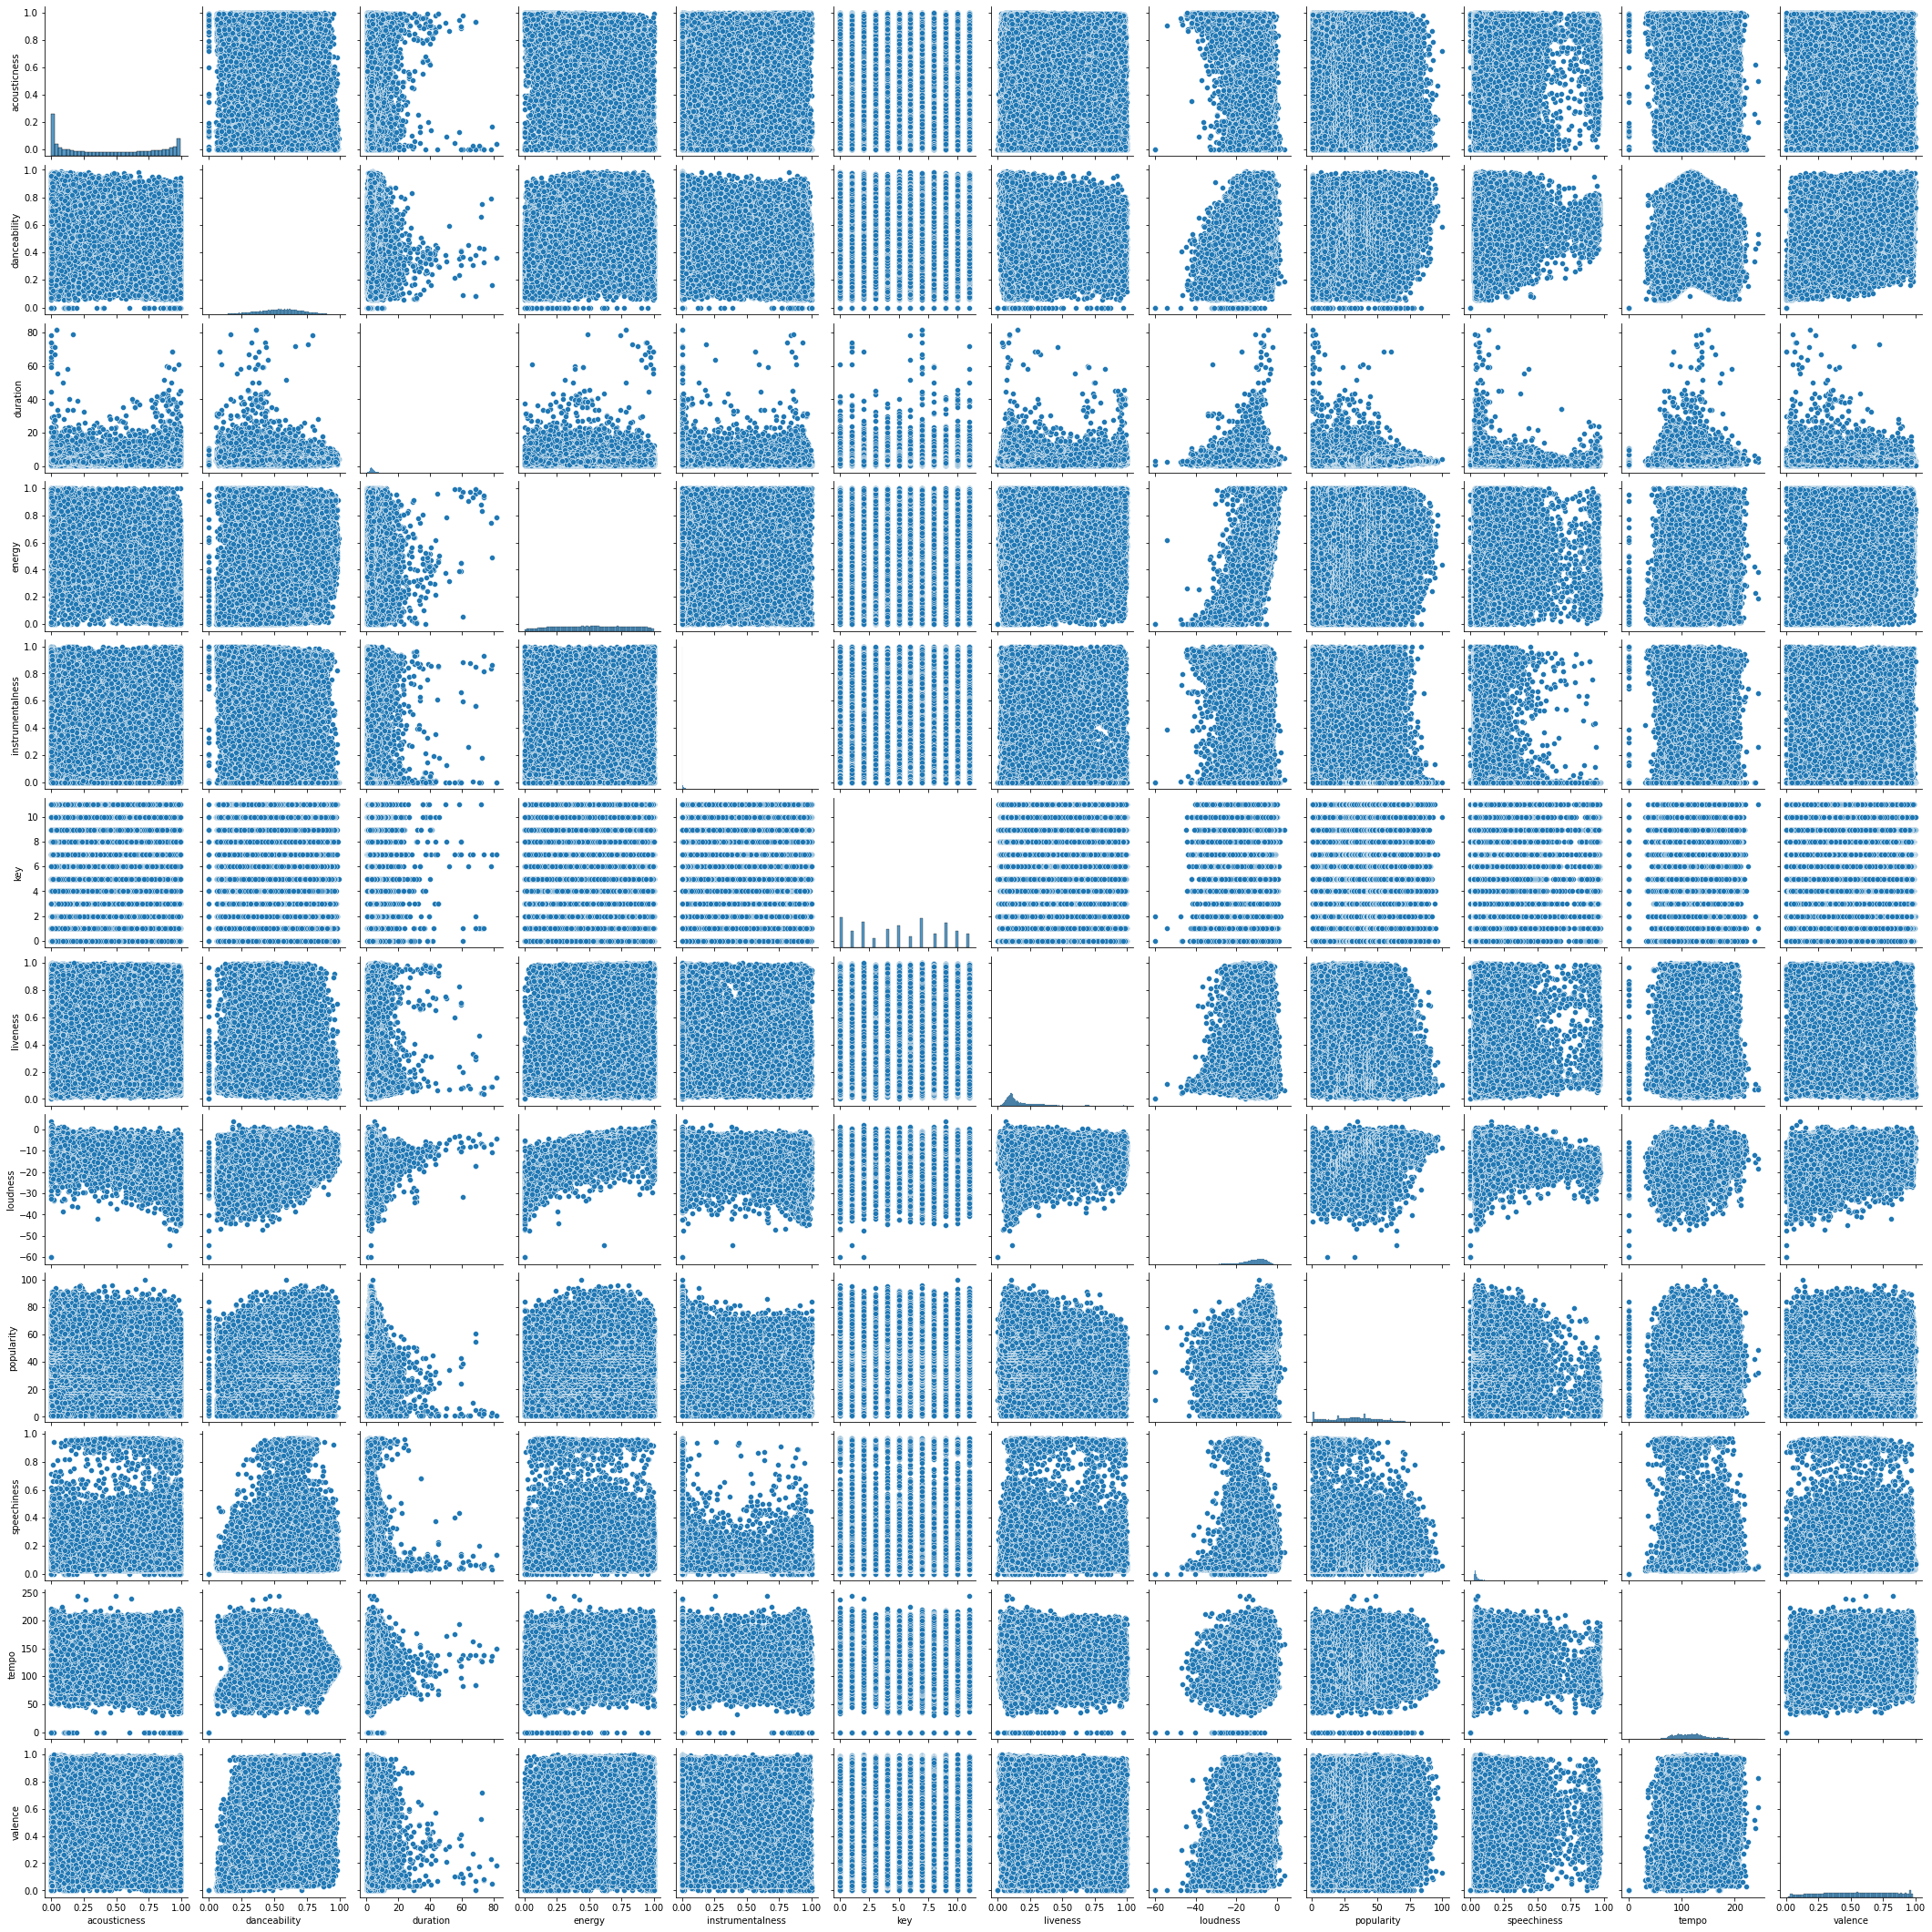

In [14]:
#Analyzing the linear relationship betwwen popularity and song features
sns.pairplot(dfNum)

**Observations:**<br>
1. The outliers showed on the distribution plot are negligible.<br>
2. From the above scatterplots, these data points are not concentrated and there is no clear and simple linear relationship between popularity and other features, thus we would not build the linear regression model for our topic, instead we would like to try some classification methods.

<AxesSubplot:>

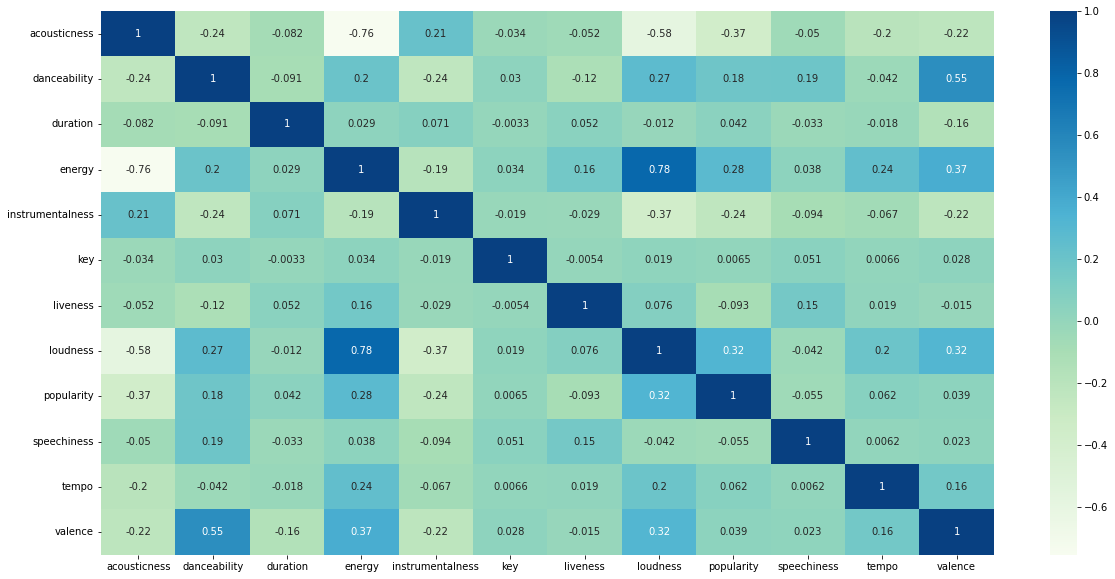

In [15]:
#Correlation between variables
plt.figure(figsize=(20, 10))
sns.heatmap(dfNum.corr(),annot = True,cmap='GnBu')

**Observation:**
1. Energy vs Loudness shows the co-efficient to be 0.78 and the acoustcness vs Energy to be -0.76, the highest among all. These observations make sense. As we all know the higher the energy, the louder a song will be, and the more a song tends to be acoustic, the less energy it will be. <br>
2. it is pity that track features have a very poor correlation with popularity. -0.37 is the highest value of negative correlation between popularity and acousticness.<br>
3. as the matrix showed above, we selected six best features:acousticness, energy, instrumentalness, loudness,duration, danceability

## Further analysis for selected features

In [16]:
#build a function for scatter plot for the selected features
def scatFig(x, y, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(8,5))
    sns.scatterplot(x, y)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)
    plt.show()

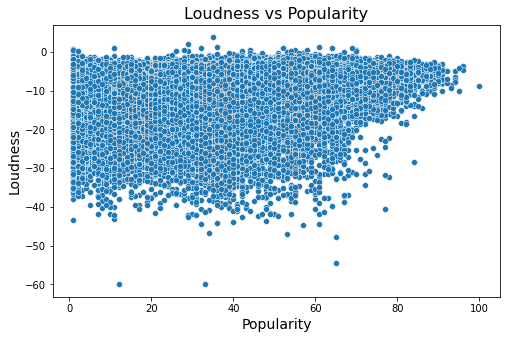

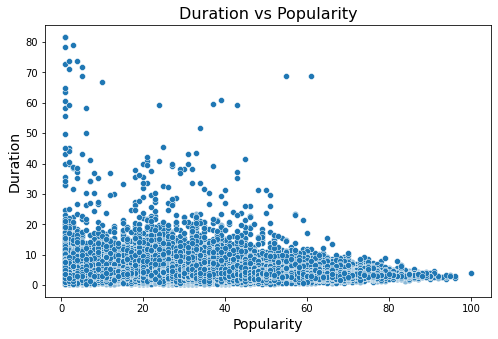

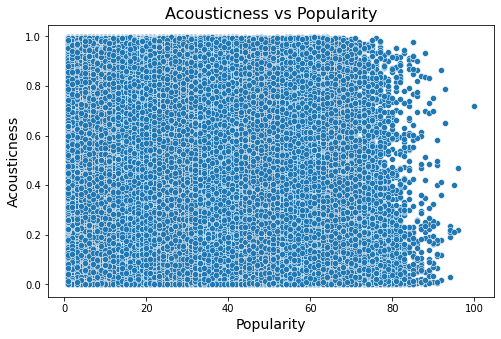

In [17]:
ax1=scatFig(dfNum.popularity, dfNum.loudness, xlabel='Popularity',ylabel='Loudness', title='Loudness vs Popularity')

ax2=scatFig(dfNum.popularity, dfNum.duration, xlabel='Popularity',ylabel='Duration', title='Duration vs Popularity')

ax3=scatFig(dfNum.popularity, dfNum.acousticness, xlabel='Popularity',ylabel='Acousticness', title='Acousticness vs Popularity')

**Observation:**<br>
1. In the Loudness vs Popularity diagram, we can see that although the song with high popularity tends to have a high score in Loudness, these top value loudness can be also found in the low and medium popularity area. This means that loudness does not directly assure popularity, but a song with a low value of loudness will be highly likely to lose popularity.
2. In the Duration vs Popularity diagram, the story of duration is the same as the above one. There is no strong fit between duration and popularity. Most of the durations are very short, covering the main popularity spectrum. we would suggest that for the popularity, a shorter duration would be better.
3. It is surprising that Acousticness has a high value of negative correlation with popularity compared with other features. Because the relationship is not quite obvious through the Acousticness vs popularity diagram. data points with the popularity under 80 are covering all the spectrum of acousticness. after 80, many data are clustered when the acousticness is under 0.2. This is fit for the fact that negative correlations between each other.

# 3. Data Preparation

In [18]:
#Finding the missing values in the columns
total = dfNum.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total],axis=1, keys='Total')
missing_data.head(20)

T
acousticness      0
danceability      0
duration          0
energy            0
instrumentalness  0
key               0
liveness          0
loudness          0
popularity        0
speechiness       0
tempo             0
valence           0

This dataset is relative clean as no missing value found

In [19]:
#classify the popularity into three categories: HIGH, MEDIUM AND LOW
level=[]
for i in df['popularity']:
    if i > 66.667:
        level.append("High")
    elif i > 33.333:
        level.append("Medium")
    else:
        level.append("Low")       

In [20]:
dfNum['Popularity_Level']=level

In [21]:
dfNum.tail()

acousticness  danceability  duration  energy  instrumentalness  key  \
174361        0.1050         0.781  2.878667   0.487             0.000    1   
174370        0.1240         0.713  2.325183   0.378             0.726    7   
174374        0.0135         0.770  3.517817   0.683             0.866    5   
174378        0.8090         0.574  2.218200   0.182             0.941    7   
174387        0.9200         0.462  4.066667   0.240             0.000    0   

        liveness  loudness  popularity  speechiness    tempo  valence  \
174361    0.0802    -7.301          61       0.1670  129.941   0.3270   
174370    0.3450   -12.905           2       0.0311  140.029   0.6410   
174374    0.1020    -6.007           1       0.0488  120.020   0.0971   
174378    0.1560   -16.197           2       0.0820   80.483   0.3300   
174387    0.1130   -12.077          69       0.0377  171.319   0.3200   

       Popularity_Level  
174361           Medium  
174370              Low  
174374              Low  
174378              Low  
174387             High

In [22]:
## scaling the features using min-max normalization. 
scaler=MinMaxScaler()
normalization_cols=['duration','key','loudness','tempo']
dfNum[normalization_cols]=scaler.fit_transform(dfNum[normalization_cols])

In [23]:
dfNum.head()

acousticness  danceability  duration  energy  instrumentalness       key  \
0      0.991000         0.598  0.031493   0.224          0.000522  0.454545   
1      0.643000         0.852  0.027776   0.517          0.026400  0.454545   
2      0.993000         0.647  0.030569   0.186          0.000018  0.000000   
3      0.000173         0.730  0.083513   0.798          0.801000  0.181818   
4      0.295000         0.704  0.030856   0.707          0.000246  0.909091   

   liveness  loudness  popularity  speechiness     tempo  valence  \
0    0.3790  0.743160          12       0.0936  0.615900   0.6340   
1    0.0809  0.827356           7       0.0534  0.356823   0.9500   
2    0.5190  0.751475           4       0.1740  0.400810   0.6890   
3    0.1280  0.826572          17       0.0425  0.525640   0.0422   
4    0.4020  0.846574           2       0.0768  0.501324   0.2990   

  Popularity_Level  
0              Low  
1              Low  
2              Low  
3              Low  
4              Low

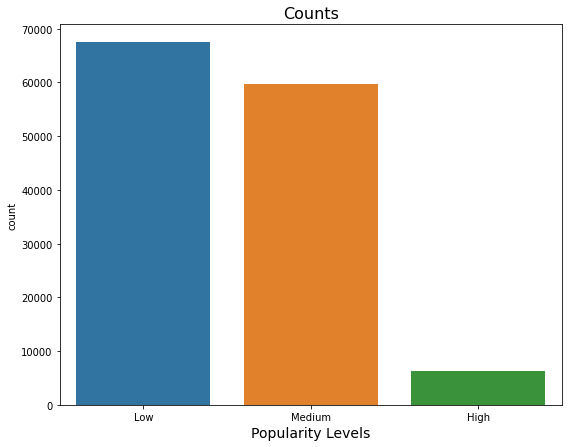

In [24]:
fig, ax = plt.subplots(1,1, figsize=(9,7))
sns.countplot(x='Popularity_Level', data=dfNum)
plt.xlabel('Popularity Levels', fontsize=14)
plt.title('Counts', fontsize=16)
plt.show()

The counts of individual classifications were visualized according to the rank of the three popularity classified. It can be seen that the three classifications of the dataset are very unbalanced.

In [25]:
#Get each popularity level of dataset
dfNum_high = dfNum[dfNum.Popularity_Level == 'High']
dfNum_medium = dfNum[dfNum.Popularity_Level == 'Medium']
dfNum_low = dfNum[dfNum.Popularity_Level == 'Low']

In [26]:
#Split the dataset into 80% to train and 20% to test randomly for each category
high_train_data, high_test_data= train_test_split(dfNum_high, test_size=0.2, random_state=42)
medium_train_data, medium_test_data = train_test_split(dfNum_medium, test_size=0.2, random_state=42)
low_train_data, low_test_data = train_test_split(dfNum_low, test_size=0.2, random_state=42)

In [27]:
#combine three category train and test dataset together
train_data = pd.concat([high_train_data,medium_train_data,low_train_data])
test_data = pd.concat([high_test_data,medium_test_data,low_test_data])
print(f'train dataset: {train_data.shape[0]}')
print(f'test dataset: {test_data.shape[0]}')

train dataset: 106787
test dataset: 26697


In [28]:
#identify the input and target
y_train=train_data['Popularity_Level']
y_test=test_data['Popularity_Level']
x_train=train_data.drop(columns=['popularity','Popularity_Level'])
x_test=test_data.drop(columns=['popularity','Popularity_Level'])

#  4. Modeling and Evaluation

In [29]:
def run_model(algorithm, x_train, x_test, y_train, y_test):
    model = algorithm
    model.fit(x_train, y_train)
    y_prediction = model.predict(x_test)
    #print('Training Accuracy: %.2f%%' % (metrics.accuracy_score(y_train, model.predict(x_train))*100))
    print('Testing Accuracy: %.2f%%' % (metrics.accuracy_score(y_test, y_prediction)*100))       

## 4.1 K-Nearest Neighbors Classification

In [30]:
run_model(KNeighborsClassifier(n_neighbors=5),x_train, x_test, y_train, y_test)

Testing Accuracy: 60.21%


In [31]:
krange = range(1, 25)
Accuracyscores = []
for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    Accuracyscores.append(metrics.accuracy_score(y_test, y_pred))
print(Accuracyscores)

[0.5687905008053339, 0.5595010675356782, 0.5856837846949096, 0.6020526650934562, 0.6020901224856725, 0.6140015732104731, 0.613364797542795, 0.618533917668652, 0.6213432220848785, 0.6274862344083605, 0.6266247143873843, 0.6296962205491253, 0.6287597857437165, 0.6336667041240589, 0.6323931527887029, 0.6340787354384387, 0.6337041615162753, 0.6370753268157471, 0.6362138067947709, 0.6370378694235307, 0.6366632955013672, 0.6377121024834251, 0.6370004120313144, 0.6388732816421321]


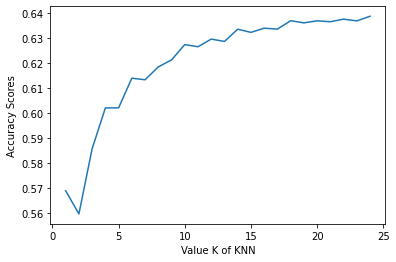

In [32]:
plt.plot(krange, Accuracyscores)
plt.xlabel('Value K of KNN')
plt.ylabel('Accuracy Scores')
plt.show()

**Observation:**<br>

As the model becomes more complex, the more accurate the training is<br>
The smaller the K value of KNN, the simpler the training set and the lower the accuracy will be<br>
Complex models are better suited to use KNN models<br>

## 4.2 Logistic Regression

In [33]:
run_model(LogisticRegression(),x_train, x_test, y_train, y_test)

Testing Accuracy: 63.68%


## 4.3 Ensemble Methods

### 4.3.1 BaggingClassifier

In [34]:
run_model(BaggingClassifier(),x_train, x_test, y_train, y_test)

Testing Accuracy: 64.44%


### 4.3.2 AdaBoostClassifier

In [35]:
run_model(AdaBoostClassifier(),x_train, x_test, y_train, y_test)

Testing Accuracy: 64.99%


### 4.3.3 RandomForestClassifier

In [36]:
run_model(RandomForestClassifier(),x_train, x_test, y_train, y_test)

Testing Accuracy: 67.88%


In [37]:
dfNum_importance= pd.DataFrame({
    'feature': x_train.columns,
    'importance':RandomForestClassifier().fit(x_train,y_train).feature_importances_
}).sort_values('importance',ascending=False)


In [38]:
dfNum_importance.head(n=8)

feature  importance
0   acousticness    0.127427
2       duration    0.116690
7       loudness    0.112219
3         energy    0.092479
1   danceability    0.088908
10       valence    0.087425
8    speechiness    0.087053
9          tempo    0.084693

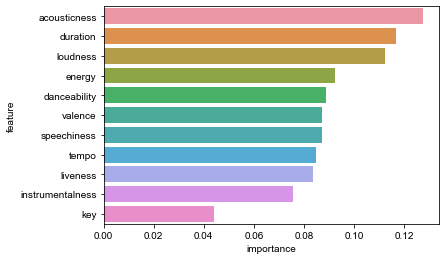

In [39]:
feature_importance=dfNum_importance
sns.barplot(y='feature',x='importance',data=feature_importance)
sns.set(rc = {'figure.figsize':(15,8)})

**Observation:**<br>
it can be seen that acousticness has the highest value of importance. After that followed by duration and loudness. The importance of energy, danceability, valence and speechiness are very close. It is plausible that the danceability and energy have a positive correlation, once one of them becomes important, the other will matter as well. For features involved, no single feature is a dominant winner. 

## 4.4 Decision Tree

In [40]:
run_model(DecisionTreeClassifier(),x_train, x_test, y_train, y_test)

Testing Accuracy: 57.27%


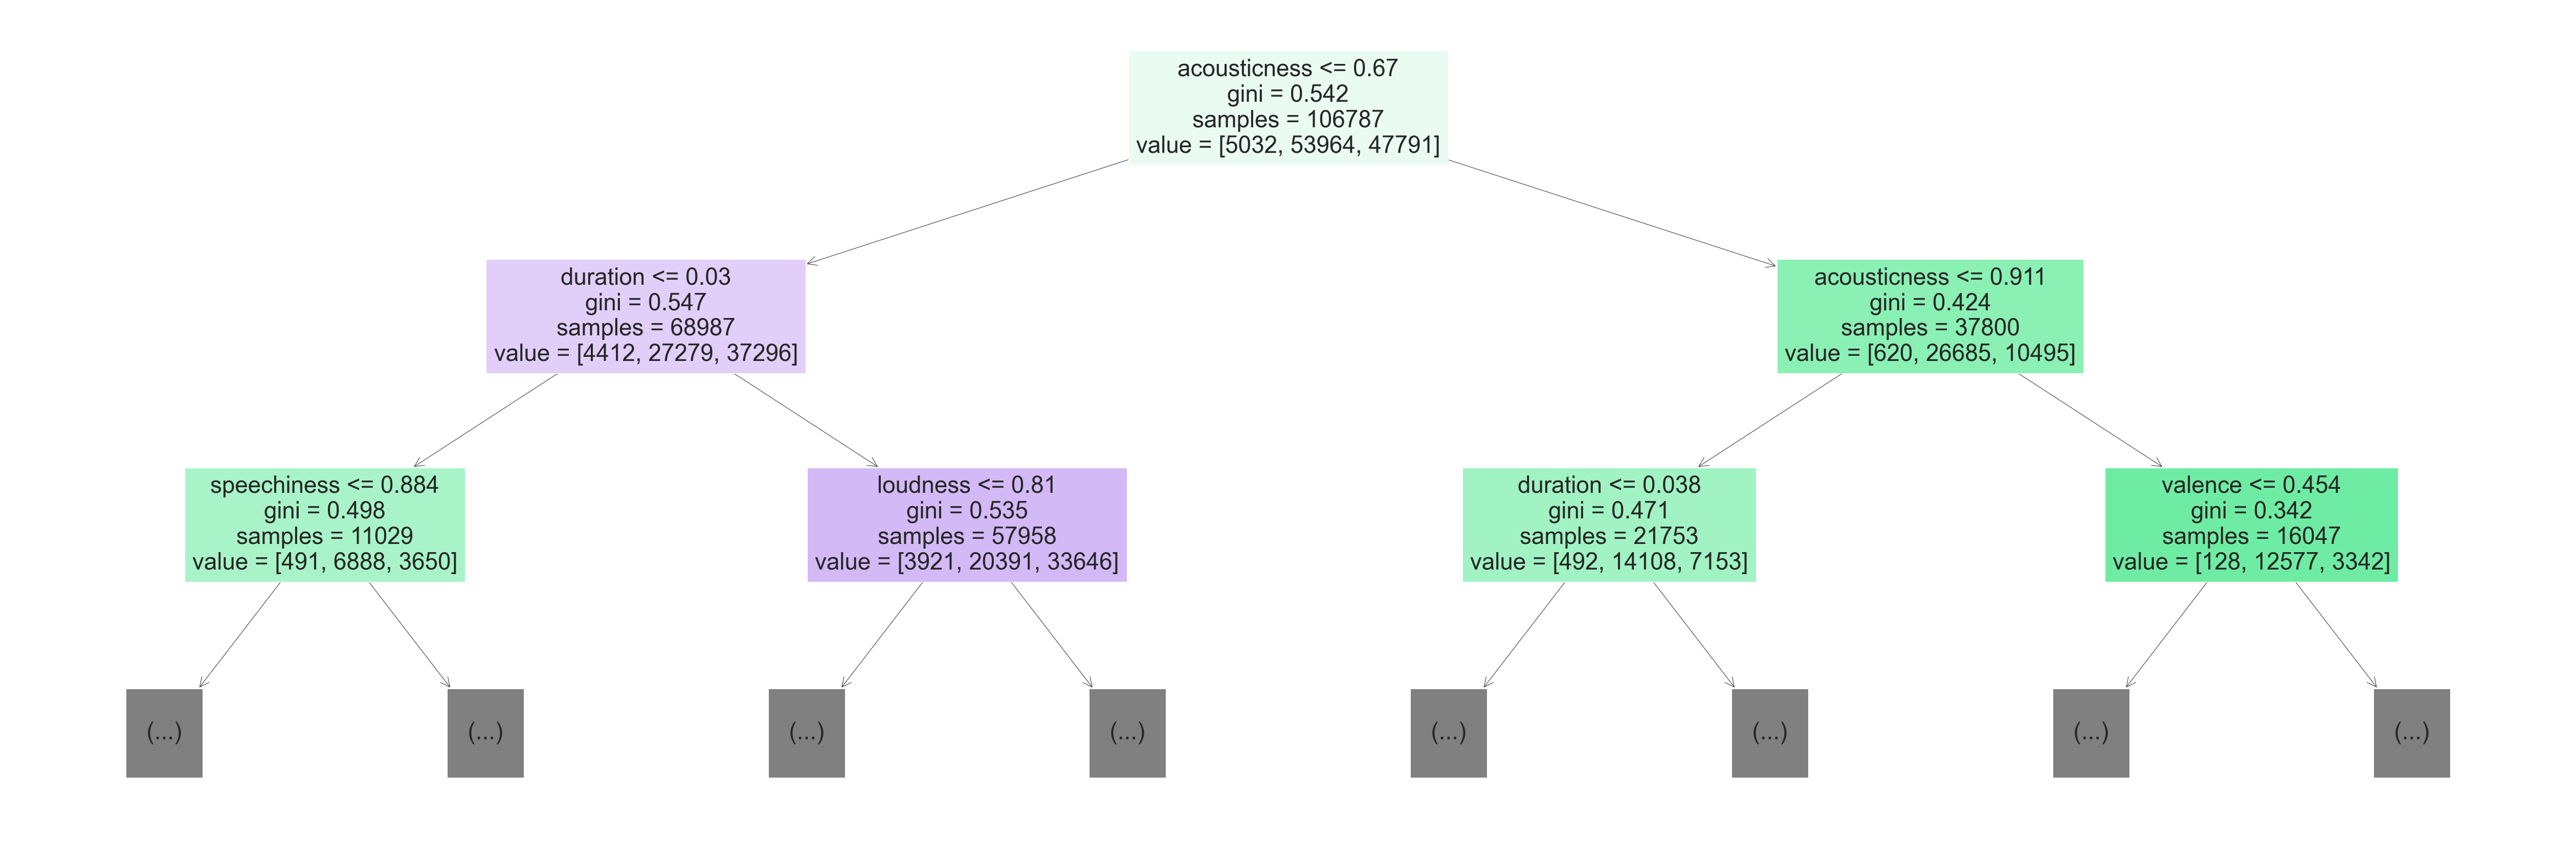

In [41]:
plt.figure(figsize=(90,30))
plot_tree(DecisionTreeClassifier().fit(x_train, y_train),feature_names=x_train.columns,max_depth=2,filled=True)
plt.show()

**Observation:**<br>

From the branches of the decision tree, we can see that accousticness and duration are important factors affecting popularity, followed by speechiness and loudness.The song with accousticness less than 0.67 and duration less than 0.029, at the same time speechiness less than 0.884 are more likely to be popular songs.

## Models Accuracy Comparison

In [43]:
fig = px.bar(
    x=["Logistic Regression", "K-Nearest-Neighbors", "Bagging", "AdaBoost", "Random Forest","Decision Tree"],
    y=[60.12,63.68,64.44, 64.99, 67.88, 57.27],
    color=["Logistic Regression", "K-Nearest-Neighbors", "Bagging", "AdaBoost", "Random Forest","Decision Tree"],
    labels={'x': "Model", 'y': "Accuracy"},
    title="Model Accuracy Comparison"
)
fig.show()

# 5. Conclusion

## 5.1 Recommendations based on EDA and Feature Importance 

It's difficult to discern a clear correlation between the features of the track and its popularity. most popular songs share some common features, for example,a song would have a high possiblility to be famous when the loudness of the song is at the high level, and the acousticness with low value as well as short duration. However, these features also can be sometimes found separately in unpopular songs. this recommendation is all about the likelihood not guarantee since it's known that there is no 100% clear formula for making popular songs, if so then there will be all popular songs around, which is impossible.

As you can see from the Model Accuracy Comparision diagram, the winner of all used models is Random Forest. Based on the feature importance of this model and previous EDA work,we find that the famous songs are likely to own some of  the following features: low acoustiness, high loudness, short duration, high danceability, low instrumentalness and high energy.

## 5.2 Benefits, limitations and expectations

1. The final model did have some benefits though with not very high total accuracy. For a music producer, they could use this model to have a general awareness of the popularity of the songs they create might have. Also, they could make some adjustments to their music based on the feedback from the model.For an A&R executive or a music agency, they can make the preliminary sift for potential popular songs among a large number of songs by conducting the model, this would reduce a large amount of work and enhance their work efficiency.
<br>

2. Due to the discrete and indirect correlation between the features and popularity, regression approaches are not effective for the model. Compared with making a numerical prediction for popularity from 0 to 100, it is easy to build a model to predict three popularity categories, like 'high','medium', and 'low'. However, when we are confident with our classification model result, we are actually far away from the ideal place where all predictions of the songs can be numerical and normalized.
<br>

3. Except for the features listed in our dataset, there are many other relevant information or indicators that might have an impact on the popularity. However, these features are not in numerical type or are hard to be transformed into numerical form. For instance, the content of the lyrics in a song, the images shown on the album, or current popular cultural trends. Thus if more factors can be conveyed numerically and put into account, the model would be more accurate and effective.

#  6. Reference